Neste notebook, será implementado o algoritmo de treinamento do Perceptron.

In [1]:
import numpy as np
import pandas as pd
from Perceptron import Perceptron
from Activation import Degree

# Dataset

O arquivo de exemplos utilizado será 'data1.txt', conforme o cálculo do identificador da equipe a seguir:

I. $matA + matB + matC + matD = 17$

II. $17 \bmod 4 = 1$


In [2]:
examples = 'data/dataAll.txt'
nparray = np.fromfile(examples)
nparray

array([-363.7884,  244.1423,    0.    , ..., -140.147 ,  734.0983,
          0.    ], shape=(3000,))

In [3]:
# Formatando o array de entrada
data = nparray.reshape(1000,3)
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]], shape=(1000, 3))

In [4]:
X = data[:, :2]
y = data[:, 2]

print(f'X: {X[:5]}\n')
print(f'Y: {y[:5]}')

X: [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]

Y: [0. 1. 0. 0. 0.]


In [5]:
p= Perceptron()
activation= Degree()

x = np.insert(X, 0, 1, axis=1) # inserindo o viés

epoch= 0
convergence= False
adjusts = 0

while not convergence:
    convergence = True
    

    for i in range(len(X)):
        u = np.dot(x[i], p.w)

        y_predicted = activation.f(u)
        error = y[i] - y_predicted
        
        
        if error != 0:
            convergence = False
            p.w = p.w + p.learning_rate * error * x[i]
            print(p.w)
            adjusts += 1
        

    epoch += 1

print(f'Convergência em {epoch} épocas')
print(f'{adjusts} ajustes feitos')

[  0.39915428  36.33557145 -24.08983267]
[   0.29915428  -17.32347855 -100.58558267]
[  0.39915428  55.47254145 -64.75602267]
[  0.49915428 138.07124145  15.09980733]
[  0.39915428 143.91700145 -63.19478267]
[   0.29915428  103.90809145 -141.08747267]
[  0.19915428 157.57790145 -91.99520267]
[   0.29915428  104.61784145 -148.86466267]
[  0.19915428 164.17736145 -98.74233267]
[   0.29915428  118.65273145 -164.37826267]
[ 1.99154284e-01  2.09368591e+02 -8.96649427e+01]
[   0.29915428  151.58760145 -149.97309267]
[   0.39915428  103.32104145 -198.44281267]
[   0.49915428  173.76839145 -156.32654267]
[   0.59915428  126.92639145 -207.73641267]
[   0.69915428  196.79002145 -143.51747267]
[   0.59915428  140.95429145 -199.69500267]
[   0.69915428  217.94176145 -134.84567267]
[   0.79915428  181.67172145 -178.07371267]
[   0.69915428  163.43258145 -196.40735267]
[   0.79915428  238.85502145 -130.35224267]
[   0.89915428  174.49589145 -212.77468267]
[   0.79915428  265.80410145 -129.50391267]


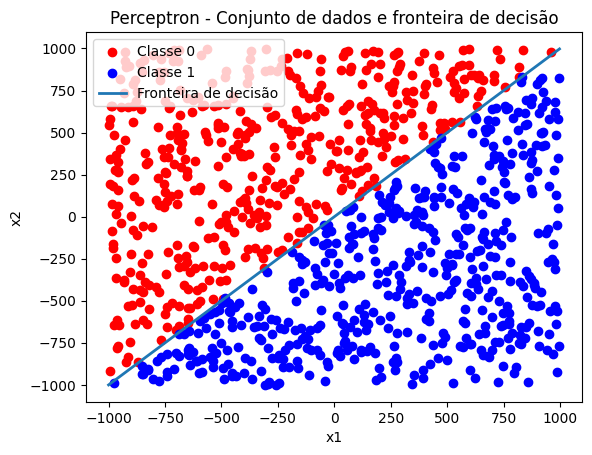

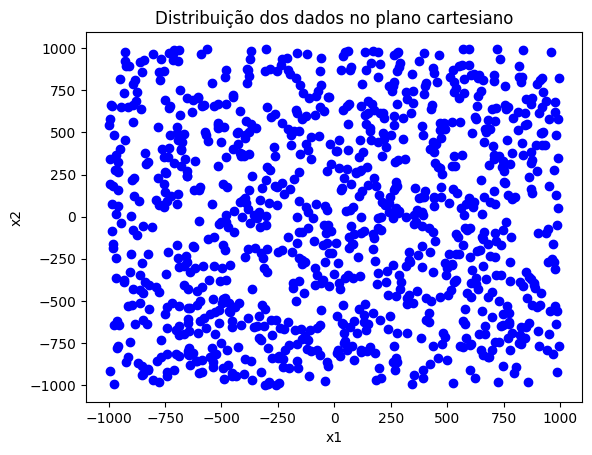

In [8]:
# Plot dos dadosd com e sem a fronteira de decisão

import matplotlib.pyplot as plt
import numpy as np

classe0 = X[y == 0]
classe1 = X[y == 1]

plt.scatter(classe0[:, 0], classe0[:, 1], label='Classe 0', marker='o', color='red')
plt.scatter(classe1[:, 0], classe1[:, 1], label='Classe 1', marker='o', color='blue')

w0, w1, w2 = p.w
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w2 != 0:
    x2_vals = -(w0 + w1 * x1_vals) / w2
    plt.plot(x1_vals, x2_vals, label='Fronteira de decisão', linewidth=2)
else:
    plt.axvline(x=-w0/w1, label='Fronteira de decisão', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Conjunto de dados e fronteira de decisão')
plt.legend()
plt.show()

plt.scatter(X[:, 0], X[:, 1], color='blue')
#Tentativa teste de plotar os dados sem o modelo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribuição dos dados no plano cartesiano')
plt.show()


